In [1]:
import pandas as pd
from scipy.sparse.linalg import svds

import dill
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns
sns.set()
import umap

from celluloid import Camera
from glob import glob

import matplotlib.pyplot as plt
import matplotlib as mpl


/home/sampad/.virtualenvs/ml/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def loadga(filename):
    data = dill.load(open(filename,'rb'))
    pop = data['pop']
    fitness = data['fitness']
    return pop,fitness

def loadpso(filename):
    data = dill.load(open(filename,'rb'))
    particles = data['position']
    costs = data['cost']
    return particles, costs

In [9]:

def animate(fpattern, mp4name):
    
    fig = plt.figure()
    plt.clf()
    # fig, ax = plt.subplots(figsize=(6, 1))
    # fig.subplots_adjust(bottom=0.5)

    cmap = mpl.cm.cool
    norm = mpl.colors.Normalize(vmin=-100, vmax=250)
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    # sm.set_array([])
    cb = plt.colorbar(sm)
                
    camera = Camera(fig)
    files = sorted(glob(fpattern))
    
    for i,f in enumerate(files):
        print(f)
        
        try:
            pop,fitness = loadpso(f)
        except:
            pop,fitness = loadga(f)

        # reducer = umap.UMAP(random_state=42)
        # embedding = reducer.fit_transform(pop)
        embedding,s,v = svds(pop,k=15)
        ax = sns.scatterplot(x=embedding[:,-1], y=embedding[:,-2], hue=fitness, palette='cool', hue_norm=(-100,250), legend=False)
        # cb.remove()
        # cb = plt.colorbar(sm)
        camera.snap()
        # fig.clf()
       

    camera.animate().save(mp4name, fps=0.5)


../store/pso/2022-07-21T16:21:17-0.dill
../store/pso/2022-07-21T16:21:17-1.dill
../store/pso/2022-07-21T16:21:17-2.dill
../store/pso/2022-07-21T16:21:17-3.dill
../store/pso/2022-07-21T16:21:17-4.dill
../store/pso/2022-07-21T16:21:17-5.dill
../store/pso/2022-07-21T16:21:17-6.dill
../store/pso/2022-07-21T16:21:17-7.dill
../store/pso/2022-07-21T16:21:17-8.dill
../store/pso/2022-07-21T16:21:17-9.dill


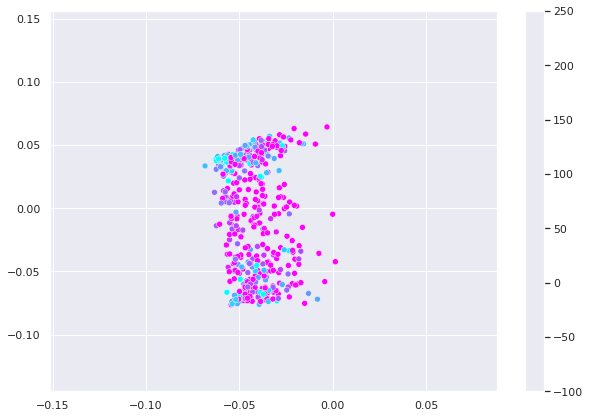

In [10]:
animate("../store/pso/2022-07-21T16:21:17*", "pso.mp4")

../store/ga/2022-07-21T16:21:34-gen:0.dill
../store/ga/2022-07-21T16:21:34-gen:1.dill
../store/ga/2022-07-21T16:21:34-gen:2.dill
../store/ga/2022-07-21T16:21:34-gen:3.dill
../store/ga/2022-07-21T16:21:34-gen:4.dill
../store/ga/2022-07-21T16:21:34-gen:5.dill
../store/ga/2022-07-21T16:21:34-gen:6.dill
../store/ga/2022-07-21T16:21:34-gen:7.dill
../store/ga/2022-07-21T16:21:34-gen:8.dill
../store/ga/2022-07-21T16:21:34-gen:9.dill


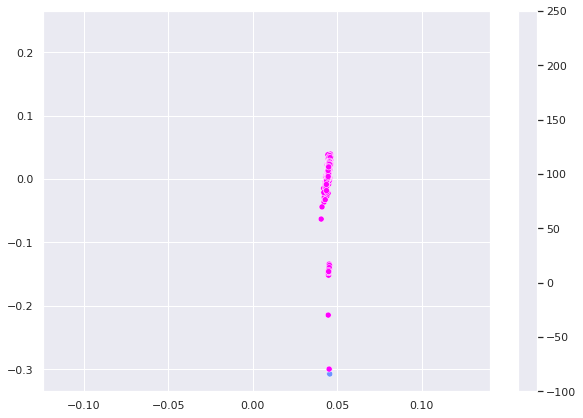

In [11]:
animate("../store/ga/2022-07-21T16:21:34-gen:*","ga.mp4")